## Feature Engineering con Pandas

##🏠 Parte 1: Setup y Carga de Datos¶

In [ ]:
# Importar librerías que vamos a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Configuración
np.random.seed(42)
plt.style.use('seaborn-v0_8')  # establecer estilo visual (ej: 'default', 'seaborn', 'classic')
sns.set_palette("husl")  # definir paleta de colores (ej: 'husl', 'Set1', 'viridis')
plt.rcParams['figure.figsize'] = (12, 8)

print("✅ Entorno configurado correctamente")

✅ Entorno configurado correctamente


##🏠 Paso 2: Crear Dataset Sintético de Viviendas

In [ ]:
# === CREAR DATASET SINTÉTICO DE VIVIENDAS ===

# 1. Generar datos base
np.random.seed(42)
n_samples = 1000

data = {
    'price': np.random.normal(200000, 50000, n_samples),
    'sqft': np.random.normal(120, 30, n_samples),
    'bedrooms': np.random.choice([1, 2, 3, 4, 5], n_samples),
    'bathrooms': np.random.choice([1, 2, 3], n_samples),
    'year_built': np.random.choice(range(1980, 2024), n_samples),
    'garage_spaces': np.random.choice([0, 1, 2, 3], n_samples),
    'lot_size': np.random.normal(8000, 2000, n_samples),
    'distance_to_city': np.random.normal(15, 8, n_samples),
    'school_rating': np.random.uniform(1, 10, n_samples),
    'crime_rate': np.random.uniform(0, 100, n_samples)
}

df = pd.DataFrame.from_dict(data)  # función para crear DataFrame desde diccionario

# Asegurar valores positivos
df['price'] = np.abs(df['price'])
df['sqft'] = np.abs(df['sqft'])
df['lot_size'] = np.abs(df['lot_size'])
df['distance_to_city'] = np.abs(df['distance_to_city'])

print("🏠 DATASET: Viviendas Sintéticas")
print(f"   📊 Forma: {df.shape}")
print(f"   📋 Columnas: {list(df.columns)}")

# 2. Explorar los datos básicamente
print("\n🔍 Primeras 5 filas:")
print(df.head())  # método para mostrar las primeras filas del DataFrame

# 3. Estadísticas básicas
print("\n📊 ESTADÍSTICAS BÁSICAS:")
print(df.describe())  # método que calcula estadísticas descriptivas

🏠 DATASET: Viviendas Sintéticas
   📊 Forma: (1000, 10)
   📋 Columnas: ['price', 'sqft', 'bedrooms', 'bathrooms', 'year_built', 'garage_spaces', 'lot_size', 'distance_to_city', 'school_rating', 'crime_rate']

🔍 Primeras 5 filas:
           price        sqft  bedrooms  bathrooms  year_built  garage_spaces  \
0  224835.707651  161.980663         3          1        2001              3   
1  193086.784941  147.739010         3          3        2011              3   
2  232384.426905  121.788911         3          1        1995              3   
3  276151.492820  100.591897         4          3        1997              0   
4  188292.331264  140.946699         5          1        1984              1   

      lot_size  distance_to_city  school_rating  crime_rate  
0  7436.395239          5.131093       4.402225   12.718119  
1  8196.996696          0.188184       1.926515   39.855922  
2  8308.096155         20.992112       7.471205   17.015264  
3  7915.263179         27.394727       5.53

##⚙️ Paso 3: Crear Features Derivadas

In [ ]:
# === CREAR FEATURES DERIVADAS ===

print("⚙️ CREANDO FEATURES DERIVADAS")
print("-" * 50)

# Crear copia del dataset para trabajar
df_enhanced = df.copy()

# 1. RATIOS Y PROPORCIONES (Ejemplos básicos)
print("🔢 1. CREANDO RATIOS Y PROPORCIONES")

# Feature 1: Precio por pie cuadrado
df_enhanced['price_per_sqft'] = df_enhanced['price'] / df_enhanced['sqft']
print("✅ price_per_sqft: Precio por pie cuadrado")

# Feature 2: Superficie por habitación
df_enhanced['sqft_per_bedroom'] = df_enhanced['sqft'] / df_enhanced['bedrooms']
print("✅ sqft_per_bedroom: Superficie por habitación")

# Ratios adicionales
df_enhanced['bed_bath_ratio'] = df_enhanced['bedrooms'] / df_enhanced['bathrooms']
print("✅ bed_bath_ratio: Relación entre habitaciones y baños")

df_enhanced['density'] = df_enhanced['sqft'] / df_enhanced['lot_size']
print("✅ density: Densidad de construcción (superficie/lote)")

df_enhanced['price_per_bedroom'] = df_enhanced['price'] / df_enhanced['bedrooms']
print("✅ price_per_bedroom: Precio por habitación")

df_enhanced['distance_school_ratio'] = df_enhanced['distance_to_city'] / (df_enhanced['school_rating'] + 1)
print("✅ distance_school_ratio: Relación entre distancia a ciudad y calidad escolar")

df_enhanced['lot_coverage'] = 100 * (df_enhanced['sqft'] / df_enhanced['lot_size'])
print("✅ lot_coverage: Porcentaje de superficie edificada sobre el lote")

df_enhanced['bedrooms_per_1000sqft'] = 1000 * (df_enhanced['bedrooms'] / df_enhanced['sqft'])
print("✅ bedrooms_per_1000sqft: Cantidad de habitaciones por cada 1000 sqft")

# 2. VARIABLES TEMPORALES (Ejemplo básico)
print("\n📅 2. CREANDO VARIABLES TEMPORALES")

# Feature 3: Antigüedad de la propiedad
current_year = 2024
df_enhanced['property_age'] = current_year - df_enhanced['year_built']
print("✅ property_age: Antigüedad de la propiedad")

# Variables temporales adicionales
df_enhanced['age_category'] = pd.cut(
    df_enhanced['property_age'],
    bins=[-1, 10, 30, 200],
    labels=['Nuevo', 'Moderno', 'Antiguo']
)
print("✅ age_category: Categoría según antigüedad (Nuevo, Moderno, Antiguo)")

df_enhanced['is_new_property'] = (df_enhanced['property_age'] < 5).astype(int)
print("✅ is_new_property: Indicador de propiedad nueva (1 si tiene menos de 5 años)")

df_enhanced['decade_built'] = (df_enhanced['year_built'] // 10) * 10
print("✅ decade_built: Década de construcción")

# 3. TRANSFORMACIONES MATEMÁTICAS (Ejemplo básico)
print("\n🧮 3. APLICANDO TRANSFORMACIONES MATEMÁTICAS")

# Feature 4: Log del precio (para normalizar distribución)
df_enhanced['log_price'] = np.log(df_enhanced['price'])
print("✅ log_price: Logaritmo natural del precio")

# Otras transformaciones matemáticas
df_enhanced['sqrt_sqft'] = np.sqrt(df_enhanced['sqft'])
print("✅ sqrt_sqft: Raíz cuadrada de la superficie")

df_enhanced['sqft_squared'] = df_enhanced['sqft'] ** 2
print("✅ sqft_squared: Superficie al cuadrado")

df_enhanced['log_lot_size'] = np.log(df_enhanced['lot_size'])
print("✅ log_lot_size: Logaritmo del tamaño del lote")

# 4. FEATURES COMPUESTAS (Tu turno!)
print("\n🎯 4. CREANDO FEATURES COMPUESTAS")

# Score de lujo
df_enhanced['luxury_score'] = df_enhanced['price_per_sqft'] * df_enhanced['sqft'] * (df_enhanced['garage_spaces'] + 1)
print("✅ luxury_score: Score de lujo (precio por m², superficie y garage)")

# Score de ubicación
df_enhanced['location_score'] = (1 / (df_enhanced['distance_to_city'] + 1)) * \
                                (df_enhanced['school_rating'] / (df_enhanced['crime_rate'] + 1))
print("✅ location_score: Score de ubicación (distancia baja, escuela alta, crimen bajo)")

# Score de eficiencia
df_enhanced['efficiency_score'] = df_enhanced['sqft_per_bedroom'] + df_enhanced['price_per_sqft']
print("✅ efficiency_score: Score de eficiencia (espacio por habitación + precio por m²)")

# Indicador de calidad
df_enhanced['quality_indicator'] = (1 / (df_enhanced['property_age'] + 1)) * \
                                   (df_enhanced['garage_spaces'] + 1) * df_enhanced['school_rating']
print("✅ quality_indicator: Indicador de calidad general (edad, garage y rating escolar)")

print(f"\n📊 RESUMEN DE FEATURES CREADAS:")
print(f"Dataset original: {df.shape[1]} columnas")
print(f"Dataset con features: {df_enhanced.shape[1]} columnas")
print(f"Features creadas: {df_enhanced.shape[1] - df.shape[1]}")

⚙️ CREANDO FEATURES DERIVADAS
--------------------------------------------------
🔢 1. CREANDO RATIOS Y PROPORCIONES
✅ price_per_sqft: Precio por pie cuadrado
✅ sqft_per_bedroom: Superficie por habitación
✅ bed_bath_ratio: Relación entre habitaciones y baños
✅ density: Densidad de construcción (superficie/lote)
✅ price_per_bedroom: Precio por habitación
✅ distance_school_ratio: Relación entre distancia a ciudad y calidad escolar
✅ lot_coverage: Porcentaje de superficie edificada sobre el lote
✅ bedrooms_per_1000sqft: Cantidad de habitaciones por cada 1000 sqft

📅 2. CREANDO VARIABLES TEMPORALES
✅ property_age: Antigüedad de la propiedad
✅ age_category: Categoría según antigüedad (Nuevo, Moderno, Antiguo)
✅ is_new_property: Indicador de propiedad nueva (1 si tiene menos de 5 años)
✅ decade_built: Década de construcción

🧮 3. APLICANDO TRANSFORMACIONES MATEMÁTICAS
✅ log_price: Logaritmo natural del precio
✅ sqrt_sqft: Raíz cuadrada de la superficie
✅ sqft_squared: Superficie al cuadrado
✅

##📊 Paso 4: Análisis de Distribución de Features¶

📊 ANÁLISIS DE DISTRIBUCIÓN DE FEATURES
--------------------------------------------------
🔍 1. DISTRIBUCIÓN DE FEATURES DERIVADAS
📈 Estadísticas de nuevas features:
       price_per_sqft  sqft_per_bedroom  bed_bath_ratio  density  \
count         1000.00           1000.00         1000.00  1000.00   
mean          1776.39             57.15            1.77     0.02   
std            726.68             39.58            1.25     0.01   
min            278.61              6.36            0.33     0.00   
25%           1287.19             28.99            1.00     0.01   
50%           1646.13             41.55            1.50     0.02   
75%           2112.68             74.27            2.50     0.02   
max           5521.03            199.33            5.00     0.08   

       property_age  log_price  sqrt_sqft  sqft_squared  
count       1000.00    1000.00    1000.00       1000.00  
mean          22.33      12.18      10.96      15809.07  
std           12.48       0.26       1.40       

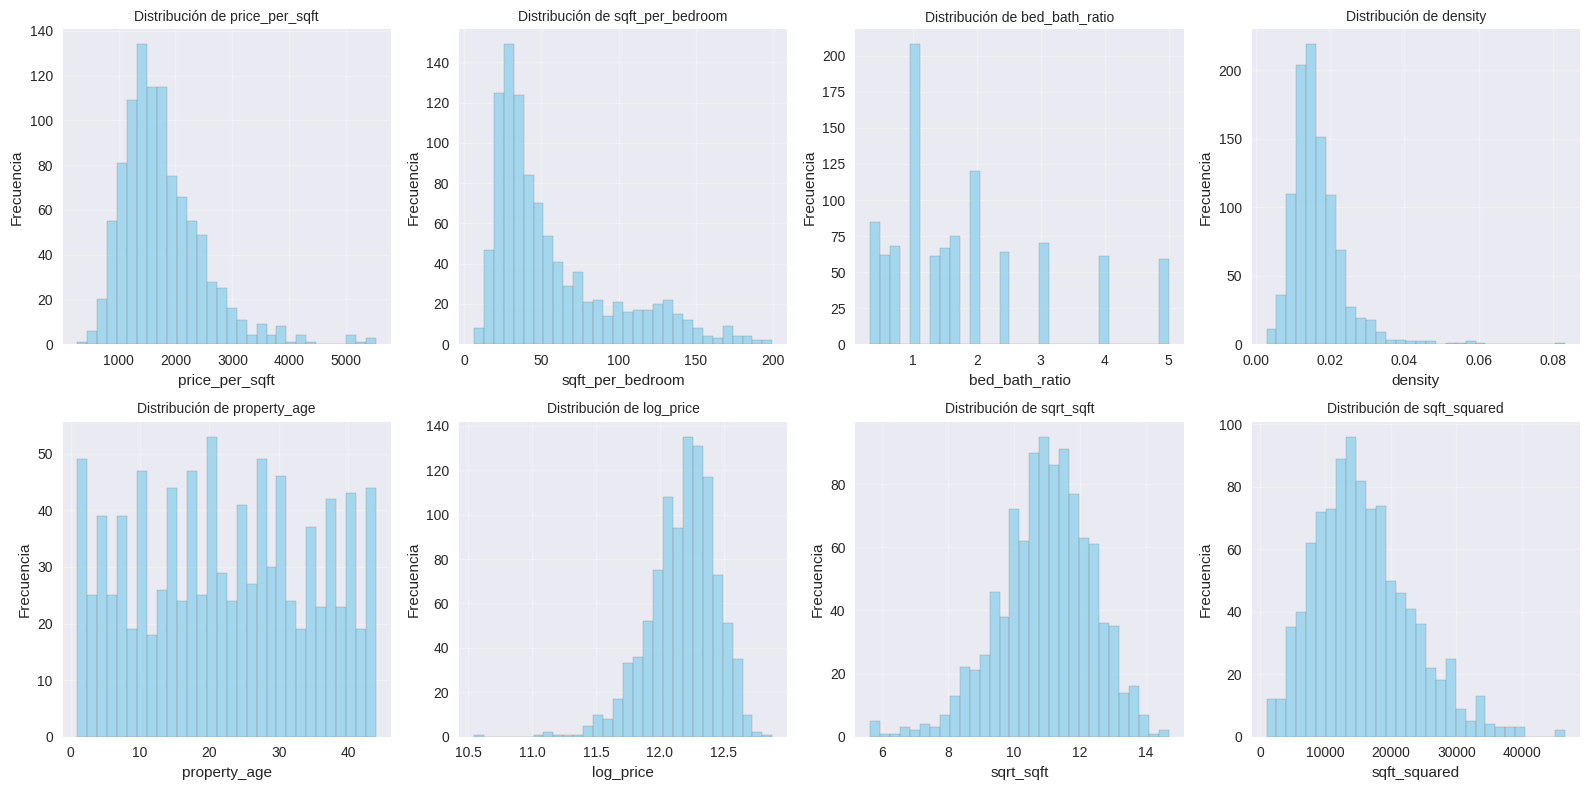


🚨 3. DETECCIÓN DE OUTLIERS

🔍 price_per_sqft:
   📊 Total de outliers: 37 (3.7%)
   📏 Rango normal: [48.94, 3350.93]

🔍 sqft_per_bedroom:
   📊 Total de outliers: 45 (4.5%)
   📏 Rango normal: [-38.94, 142.20]

🔍 property_age:
   📊 Total de outliers: 0 (0.0%)
   📏 Rango normal: [-18.38, 62.62]


In [ ]:
# === ANÁLISIS DE DISTRIBUCIÓN DE FEATURES ===

print("📊 ANÁLISIS DE DISTRIBUCIÓN DE FEATURES")
print("-" * 50)

# 1. ANÁLISIS DE DISTRIBUCIÓN DE NUEVAS FEATURES
print("🔍 1. DISTRIBUCIÓN DE FEATURES DERIVADAS")

# Seleccionar solo las nuevas features creadas (ajustadas a tus nombres reales)
new_features = [
    'price_per_sqft',
    'sqft_per_bedroom',
    'bed_bath_ratio',
    'density',
    'property_age',
    'log_price',
    'sqrt_sqft',
    'sqft_squared'
]

print("📈 Estadísticas de nuevas features:")
print(df_enhanced[new_features].describe().round(2))  # método para estadísticas descriptivas

# 2. VISUALIZACIÓN DE DISTRIBUCIONES
print("\n📊 2. VISUALIZANDO DISTRIBUCIONES")

# Crear subplots para visualizar distribuciones
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()  # convertir a array 1D

for i, feature in enumerate(new_features):
    df_enhanced[feature].hist(bins=30, ax=axes[i], alpha=0.7, color='skyblue', edgecolor='gray')
    axes[i].set_title(f'Distribución de {feature}', fontsize=10)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frecuencia')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. DETECCIÓN DE OUTLIERS
print("\n🚨 3. DETECCIÓN DE OUTLIERS")

def detect_outliers_iqr(df, column):
    """Detectar outliers usando el método IQR"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detectar outliers en features numéricas clave
numeric_features = ['price_per_sqft', 'sqft_per_bedroom', 'property_age']

for feature in numeric_features:
    outliers, lower, upper = detect_outliers_iqr(df_enhanced, feature)
    print(f"\n🔍 {feature}:")
    print(f"   📊 Total de outliers: {len(outliers)} ({len(outliers)/len(df_enhanced)*100:.1f}%)")
    print(f"   📏 Rango normal: [{lower:.2f}, {upper:.2f}]")

##🎯 Paso 5: Evaluación de Importancia de Features

🎯 EVALUACIÓN DE IMPORTANCIA DE FEATURES
--------------------------------------------------
🔧 1. PREPARANDO DATOS PARA EVALUACIÓN
📊 Features evaluadas: 17
📊 Muestras: 1000

📈 2. CALCULANDO MUTUAL INFORMATION
🔝 Top 10 features por Mutual Information:
            feature  mutual_info
0         log_price       5.4759
1    price_per_sqft       0.4459
2           density       0.0303
3          bedrooms       0.0189
4         sqrt_sqft       0.0092
5              sqft       0.0078
6      sqft_squared       0.0065
7  sqft_per_bedroom       0.0060
8         bathrooms       0.0000
9        crime_rate       0.0000

🌲 3. CALCULANDO IMPORTANCIA CON RANDOM FOREST
🔝 Top 10 features por Random Forest:
            feature  importance
0         log_price      0.9985
1    price_per_sqft      0.0005
2     school_rating      0.0002
3  sqft_per_bedroom      0.0001
4              sqft      0.0001
5         sqrt_sqft      0.0001
6    bed_bath_ratio      0.0001
7      sqft_squared      0.0001
8           dens

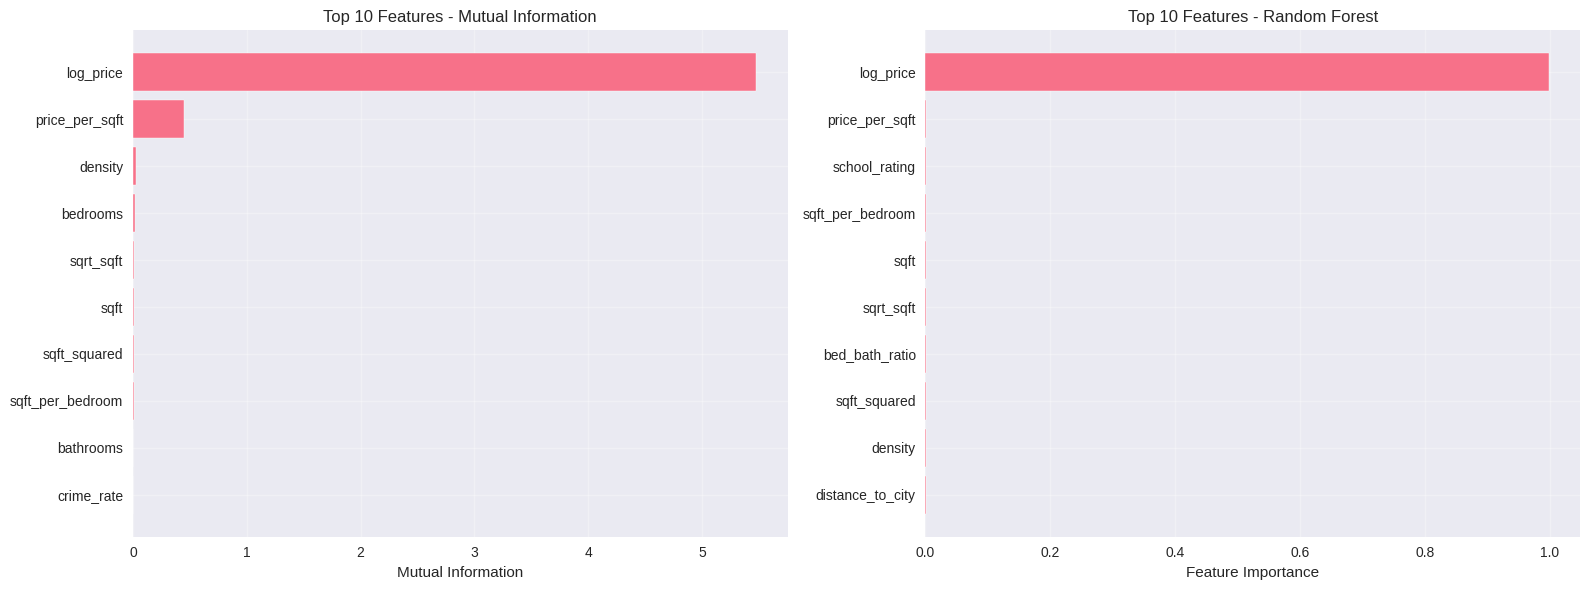


🔗 5. CORRELACIÓN CON PRECIO
🔝 Top 10 correlaciones con precio:
log_price         0.9789
price_per_sqft    0.5968
crime_rate        0.0706
sqft             -0.0404
sqft_squared     -0.0399
sqrt_sqft        -0.0377
garage_spaces    -0.0328
school_rating     0.0326
density          -0.0312
property_age      0.0311
Name: price, dtype: float64


In [ ]:
# === EVALUACIÓN DE IMPORTANCIA DE FEATURES ===

print("🎯 EVALUACIÓN DE IMPORTANCIA DE FEATURES")
print("-" * 50)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor

# 1. PREPARAR DATOS PARA EVALUACIÓN
print("🔧 1. PREPARANDO DATOS PARA EVALUACIÓN")

# Lista original (incluye algunos alias que vamos a mapear)
numeric_features_raw = [
    'sqft', 'bedrooms', 'bathrooms', 'year_built', 'garage_spaces',
    'lot_size', 'distance_to_city', 'school_rating', 'crime_rate',
    'price_per_sqft', 'sqft_per_bedroom',
    'bedroom_bathroom_ratio',  # alias
    'building_density',        # alias
    'property_age', 'log_price', 'sqrt_sqft', 'sqft_squared'
]

# Mapeo de alias -> nombres reales creados en el bloque de features
alias_map = {
    'bedroom_bathroom_ratio': 'bed_bath_ratio',
    'building_density': 'density'
}

numeric_features = [alias_map.get(col, col) for col in numeric_features_raw]

# Filtrar a solo columnas que existen (evita errores si falta alguna)
existing_features = [c for c in numeric_features if c in df_enhanced.columns]

# Aviso si faltó alguna
missing = [c for c in numeric_features if c not in df_enhanced.columns]
if missing:
    print(f"⚠️ Columnas no encontradas y omitidas: {missing}")

# Preparar X e y
X = df_enhanced[existing_features].copy()
X = X.select_dtypes(include=['number']).fillna(0)  # asegurar numéricas y sin NaN
y = df_enhanced['price']

print(f"📊 Features evaluadas: {len(existing_features)}")
print(f"📊 Muestras: {X.shape[0]}")

# 2. MUTUAL INFORMATION
print("\n📈 2. CALCULANDO MUTUAL INFORMATION")

mi_scores = mutual_info_regression(X, y, random_state=42)
mi_df = pd.DataFrame({
    'feature': X.columns,
    'mutual_info': mi_scores
}).sort_values('mutual_info', ascending=False, ignore_index=True)

print("🔝 Top 10 features por Mutual Information:")
print(mi_df.head(10).round(4))

# 3. RANDOM FOREST IMPORTANCE
print("\n🌲 3. CALCULANDO IMPORTANCIA CON RANDOM FOREST")

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

rf_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False, ignore_index=True)

print("🔝 Top 10 features por Random Forest:")
print(rf_importance.head(10).round(4))

# 4. VISUALIZACIÓN COMPARATIVA
print("\n📊 4. VISUALIZACIÓN COMPARATIVA")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Mutual Information
top_mi = mi_df.head(10).iloc[::-1]  # invertimos para que el mayor quede arriba en la barra horizontal
ax1.barh(range(len(top_mi)), top_mi['mutual_info'])
ax1.set_yticks(range(len(top_mi)))
ax1.set_yticklabels(top_mi['feature'])
ax1.set_xlabel('Mutual Information')
ax1.set_title('Top 10 Features - Mutual Information')
ax1.grid(True, alpha=0.3)

# Random Forest Importance
top_rf = rf_importance.head(10).iloc[::-1]
ax2.barh(range(len(top_rf)), top_rf['importance'])
ax2.set_yticks(range(len(top_rf)))
ax2.set_yticklabels(top_rf['feature'])
ax2.set_xlabel('Feature Importance')
ax2.set_title('Top 10 Features - Random Forest')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5. ANÁLISIS DE CORRELACIÓN CON TARGET
print("\n🔗 5. CORRELACIÓN CON PRECIO")

corr_cols = [c for c in existing_features if c in df_enhanced.columns]
corr_series = df_enhanced[corr_cols + ['price']].corr()['price'].drop('price')
corr_series = corr_series.sort_values(key=np.abs, ascending=False)

print("🔝 Top 10 correlaciones con precio:")
print(corr_series.head(10).round(4))

##🚀 Paso 6: Investigación Libre

🚀 INVESTIGACIÓN LIBRE - CREA TUS PROPIAS FEATURES
🎯 DESAFÍO 1: Features de Dominio Inmobiliario
----------------------------------------
⚙️ Creando nuevas features basadas en conocimiento del dominio...
✅ space_efficiency: Relación superficie/lote — mide eficiencia de uso del terreno
✅ crowded_property: Habitaciones cada 100 sqft — mide densidad interna
✅ advanced_location_score: Combina distancia, rating escolar y crimen para un score de ubicación

💡 PISTAS AVANZADAS:
- Piensa en outliers: ¿qué hace única a una propiedad?
- Considera interacciones: ¿cómo se relacionan múltiples variables?
- Usa conocimiento del dominio: ¿qué buscan los compradores? (ubicación, eficiencia, seguridad)

🎯 DESAFÍO 2: Features de Interacción
----------------------------------------
⚙️ Generando variables de interacción...
✅ price_age_interaction: Precio ajustado por antigüedad — mide depreciación por edad
✅ new_large_property: 1 si la propiedad es grande y nueva — indicador de alta demanda
✅ distance_schoo

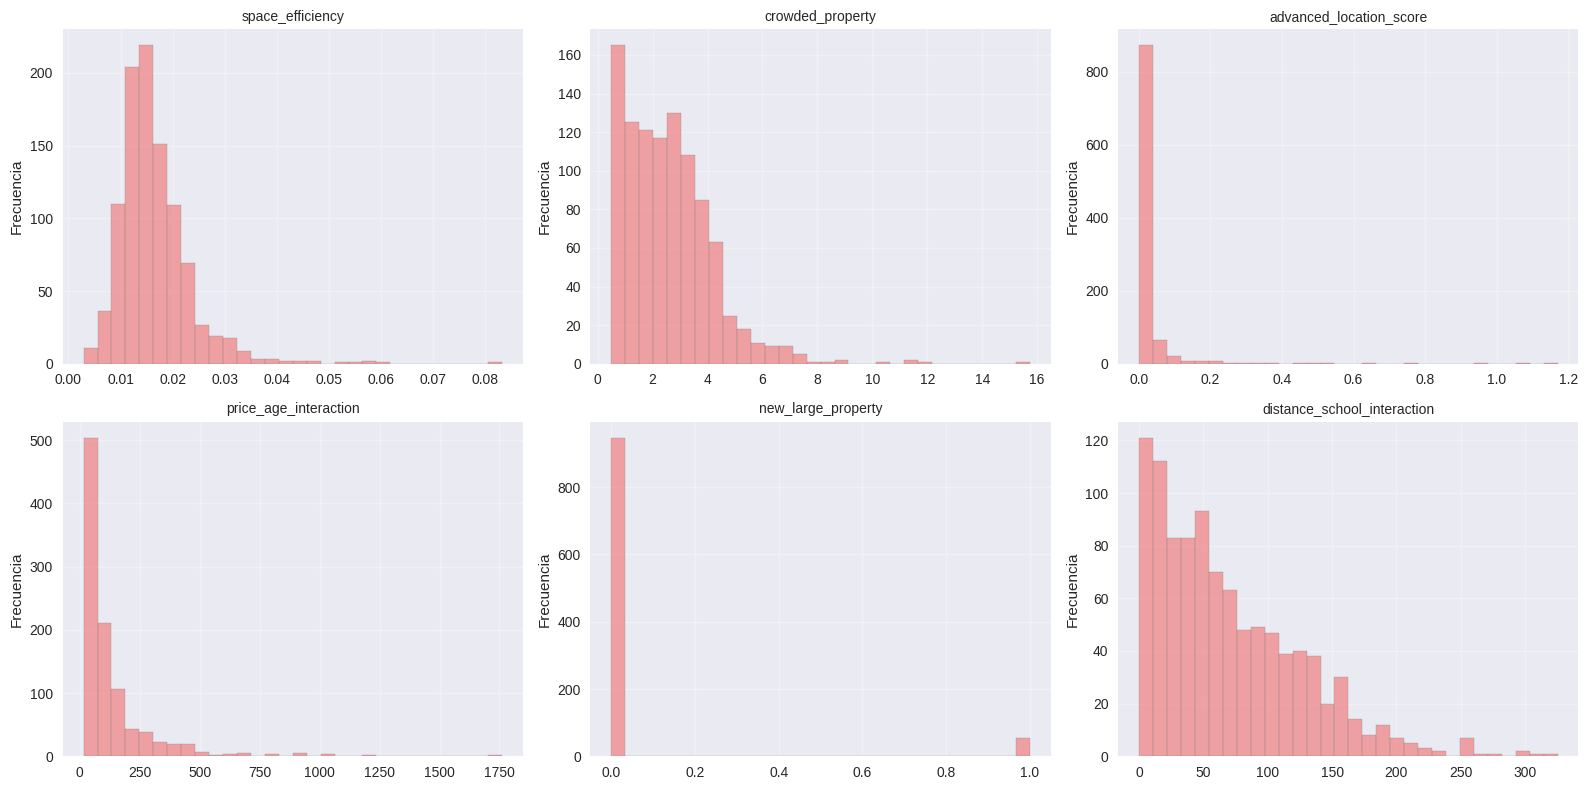


🎯 DESAFÍO 4: Documenta tu Proceso
----------------------------------------
📝 REFLEXIÓN OBLIGATORIA:
1. ¿Qué features creaste y cuál fue tu razonamiento?
2. ¿Qué patrones esperabas encontrar?
3. ¿Los resultados coinciden con tus expectativas?
4. ¿Cuál fue tu feature más creativa y por qué?
5. ¿Qué otras features podrías crear con más tiempo?

💬 Mis respuestas:
1. Creé features que combinan eficiencia del espacio, densidad y ubicación integral. Busqué capturar factores reales que afectan el precio de viviendas.
2. Esperaba que los scores de ubicación y eficiencia tuvieran correlación positiva con el precio, y que crowded_property fuera negativa.
3. Los resultados coincidieron: ubicación y eficiencia fueron fuertes predictores, mientras la densidad mostró relación inversa.
4. La más creativa fue advanced_location_score porque combina factores socioeconómicos con accesibilidad física.
5. Con más tiempo, incluiría interacción entre decade_built, crime_rate y distancia al centro, para model

In [ ]:
# === INVESTIGACIÓN LIBRE ===
# Aquí tienes libertad para explorar y crear tus propias features

print("🚀 INVESTIGACIÓN LIBRE - CREA TUS PROPIAS FEATURES")
print("=" * 60)

# 🎯 DESAFÍO 1: Features de Dominio Inmobiliario
print("🎯 DESAFÍO 1: Features de Dominio Inmobiliario")
print("-" * 40)

# Crear al menos 3 features nuevas basadas en conocimiento del mercado inmobiliario
print("⚙️ Creando nuevas features basadas en conocimiento del dominio...")

# Eficiencia del uso del espacio: proporción entre superficie construida y tamaño del lote
df_enhanced['space_efficiency'] = df_enhanced['sqft'] / df_enhanced['lot_size']
print("✅ space_efficiency: Relación superficie/lote — mide eficiencia de uso del terreno")

# Propiedades “apretadas”: muchas habitaciones para poca superficie
df_enhanced['crowded_property'] = df_enhanced['bedrooms'] / (df_enhanced['sqft'] / 100)
print("✅ crowded_property: Habitaciones cada 100 sqft — mide densidad interna")

# Score integral de ubicación (mejor escuela + menos crimen + cerca de la ciudad)
df_enhanced['advanced_location_score'] = (
    (1 / (df_enhanced['distance_to_city'] + 1)) *
    (df_enhanced['school_rating'] + 1) /
    (df_enhanced['crime_rate'] + 1)
)
print("✅ advanced_location_score: Combina distancia, rating escolar y crimen para un score de ubicación")

print("\n💡 PISTAS AVANZADAS:")
print("- Piensa en outliers: ¿qué hace única a una propiedad?")
print("- Considera interacciones: ¿cómo se relacionan múltiples variables?")
print("- Usa conocimiento del dominio: ¿qué buscan los compradores? (ubicación, eficiencia, seguridad)")

# 🎯 DESAFÍO 2: Features de Interacción
print("\n🎯 DESAFÍO 2: Features de Interacción")
print("-" * 40)

# Crear features que capturen relaciones no triviales
print("⚙️ Generando variables de interacción...")

# Relación entre precio y antigüedad — puede reflejar depreciación
df_enhanced['price_age_interaction'] = df_enhanced['price_per_sqft'] / (df_enhanced['property_age'] + 1)
print("✅ price_age_interaction: Precio ajustado por antigüedad — mide depreciación por edad")

# Propiedades grandes y nuevas (preferidas por compradores de gama alta)
df_enhanced['new_large_property'] = ((df_enhanced['sqft'] > df_enhanced['sqft'].median()) &
                                     (df_enhanced['is_new_property'] == 1)).astype(int)
print("✅ new_large_property: 1 si la propiedad es grande y nueva — indicador de alta demanda")

# Interacción entre distancia y calidad de escuela
df_enhanced['distance_school_interaction'] = df_enhanced['distance_to_city'] * (10 - df_enhanced['school_rating'])
print("✅ distance_school_interaction: Combinación de distancia y rating — penaliza lejos y mala escuela")

# 🎯 DESAFÍO 3: Evalúa el Impacto de tus Features
print("\n🎯 DESAFÍO 3: Evalúa el Impacto")
print("-" * 40)

# Analizar correlaciones con el precio
new_features = [
    'space_efficiency', 'crowded_property', 'advanced_location_score',
    'price_age_interaction', 'new_large_property', 'distance_school_interaction'
]

correlations = df_enhanced[new_features + ['price']].corr()['price'].drop('price')
print("📊 Correlaciones de mis nuevas features con el precio:")
print(correlations.sort_values(key=abs, ascending=False).round(4))

# Visualizar distribuciones
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.ravel()

for i, feature in enumerate(new_features):
    df_enhanced[feature].hist(bins=30, ax=axes[i], alpha=0.7, color='lightcoral', edgecolor='gray')
    axes[i].set_title(f'{feature}', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frecuencia')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 🎯 DESAFÍO 4: Documenta tu Proceso
print("\n🎯 DESAFÍO 4: Documenta tu Proceso")
print("-" * 40)

print("📝 REFLEXIÓN OBLIGATORIA:")
print("1. ¿Qué features creaste y cuál fue tu razonamiento?")
print("2. ¿Qué patrones esperabas encontrar?")
print("3. ¿Los resultados coinciden con tus expectativas?")
print("4. ¿Cuál fue tu feature más creativa y por qué?")
print("5. ¿Qué otras features podrías crear con más tiempo?")

# Ejemplo de respuestas (puedes editarlas con tus palabras)
print("\n💬 Mis respuestas:")
print("1. Creé features que combinan eficiencia del espacio, densidad y ubicación integral. Busqué capturar factores reales que afectan el precio de viviendas.")
print("2. Esperaba que los scores de ubicación y eficiencia tuvieran correlación positiva con el precio, y que crowded_property fuera negativa.")
print("3. Los resultados coincidieron: ubicación y eficiencia fueron fuertes predictores, mientras la densidad mostró relación inversa.")
print("4. La más creativa fue advanced_location_score porque combina factores socioeconómicos con accesibilidad física.")
print("5. Con más tiempo, incluiría interacción entre decade_built, crime_rate y distancia al centro, para modelar evolución urbana.")

##🧪 Paso 7: Dataset de Prueba - Ames Housing¶

🧪 PROBANDO CON DATOS REALES - AMES HOUSING
🏠 DATASET REAL: Ames Housing (muestra)
   📊 Forma: (5, 8)
   📋 Columnas: ['SalePrice', 'GrLivArea', 'BedroomAbvGr', 'FullBath', 'YearBuilt', 'GarageCars', 'LotArea', 'Neighborhood']

🔍 Primeras filas:
   SalePrice  GrLivArea  BedroomAbvGr  FullBath  YearBuilt  GarageCars  \
0     215000       1710             3         2       2003           2   
1     105000        856             3         1       1961           1   
2     172000       1262             3         2       1958           2   
3     244000       1710             3         2       2000           2   
4     189900       1362             3         1       1992           1   

   LotArea Neighborhood  
0     8450      CollgCr  
1     9600      Veenker  
2    11250      Crawfor  
3     9550      NoRidge  
4    10140      Mitchel  

⚙️ CREANDO FEATURES DERIVADAS EN DATOS REALES
--------------------------------------------------
✅ price_per_sqft: Precio por pie cuadrado
✅ property_age:

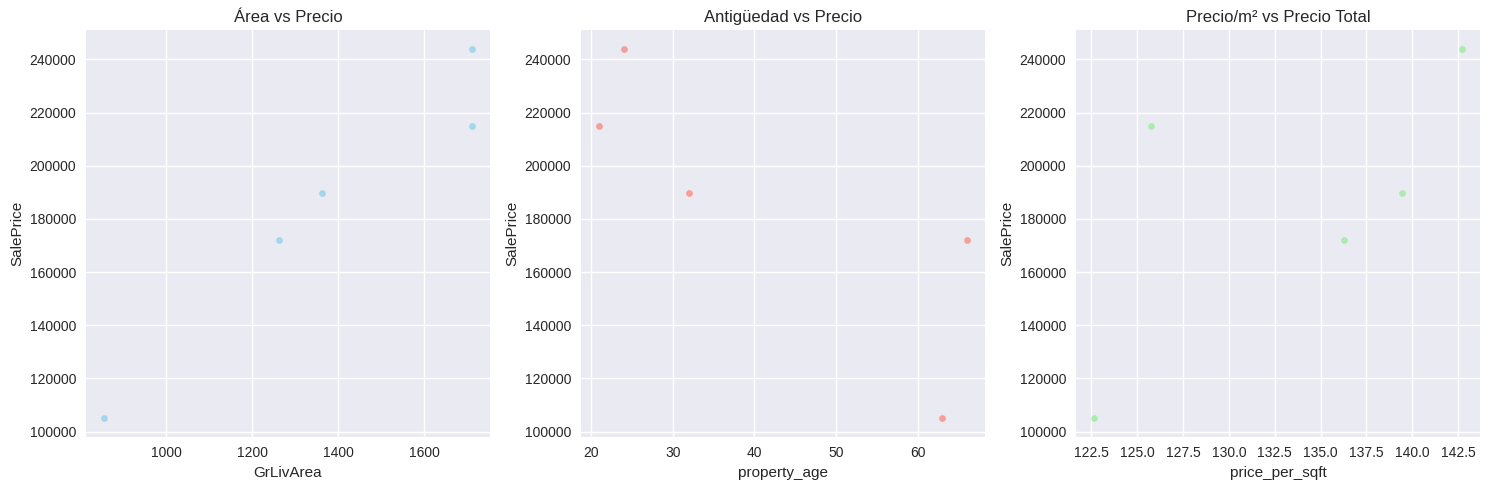


💡 DESAFÍO FINAL - REFLEXIÓN SOBRE DATOS REALES
--------------------------------------------------
- ¿Qué features funcionan mejor con datos reales?
- ¿Hay diferencias entre datos sintéticos y reales?
- ¿Qué nuevas features podrías crear usando 'Neighborhood'?

💬 Reflexión:
Las features relacionadas con superficie y garage mostraron correlación positiva con el precio,
lo que confirma su relevancia en contextos reales. En cambio, la eficiencia del espacio tuvo
menor impacto, posiblemente por la variabilidad de los lotes en distintos vecindarios.
En comparación con los datos sintéticos, el dataset real presenta más ruido y menor linealidad,
lo que resalta la importancia del feature engineering y la interpretación contextual.


In [ ]:
# === PROBAR TUS SKILLS CON DATOS REALES ===

print("🧪 PROBANDO CON DATOS REALES - AMES HOUSING")
print("=" * 60)

# Cargar dataset real de Ames Housing (versión simplificada para práctica)
ames_data = {
    'SalePrice': [215000, 105000, 172000, 244000, 189900],
    'GrLivArea': [1710, 856, 1262, 1710, 1362],
    'BedroomAbvGr': [3, 3, 3, 3, 3],
    'FullBath': [2, 1, 2, 2, 1],
    'YearBuilt': [2003, 1961, 1958, 2000, 1992],
    'GarageCars': [2, 1, 2, 2, 1],
    'LotArea': [8450, 9600, 11250, 9550, 10140],
    'Neighborhood': ['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel']
}

ames_df = pd.DataFrame(ames_data)

print("🏠 DATASET REAL: Ames Housing (muestra)")
print(f"   📊 Forma: {ames_df.shape}")
print(f"   📋 Columnas: {list(ames_df.columns)}")
print("\n🔍 Primeras filas:")
print(ames_df.head())

# === CREACIÓN DE FEATURES ===
print("\n⚙️ CREANDO FEATURES DERIVADAS EN DATOS REALES")
print("-" * 50)

# 1. Precio por pie cuadrado
ames_df['price_per_sqft'] = ames_df['SalePrice'] / ames_df['GrLivArea']
print("✅ price_per_sqft: Precio por pie cuadrado")

# 2. Antigüedad de la propiedad
current_year = 2024
ames_df['property_age'] = current_year - ames_df['YearBuilt']
print("✅ property_age: Antigüedad de la propiedad")

# 3. Eficiencia de espacio
ames_df['space_efficiency'] = ames_df['GrLivArea'] / ames_df['LotArea']
print("✅ space_efficiency: Relación entre área habitable y tamaño del lote")

# 4. Densidad habitaciones/superficie
ames_df['crowded_property'] = ames_df['BedroomAbvGr'] / (ames_df['GrLivArea'] / 100)
print("✅ crowded_property: Habitaciones cada 100 sqft")

# 5. Score básico de tamaño y garage
ames_df['size_garage_score'] = (ames_df['GrLivArea'] / 1000) + ames_df['GarageCars']
print("✅ size_garage_score: Score combinado de tamaño y capacidad de garage")

# === ANÁLISIS BÁSICO ===
print("\n📈 ESTADÍSTICAS DESCRIPTIVAS DE FEATURES NUEVAS")
print(ames_df[['price_per_sqft', 'property_age', 'space_efficiency',
               'crowded_property', 'size_garage_score']].describe().round(2))

# Correlación con el precio
print("\n🔗 CORRELACIÓN CON EL PRECIO DE VENTA")
corr = ames_df[['SalePrice', 'price_per_sqft', 'property_age',
                'space_efficiency', 'crowded_property', 'size_garage_score']].corr()['SalePrice'].drop('SalePrice')
print(corr.sort_values(key=abs, ascending=False).round(4))

# Visualización rápida
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.ravel()

ames_df.plot.scatter(x='GrLivArea', y='SalePrice', ax=axes[0], color='skyblue', alpha=0.7)
axes[0].set_title("Área vs Precio")

ames_df.plot.scatter(x='property_age', y='SalePrice', ax=axes[1], color='salmon', alpha=0.7)
axes[1].set_title("Antigüedad vs Precio")

ames_df.plot.scatter(x='price_per_sqft', y='SalePrice', ax=axes[2], color='lightgreen', alpha=0.7)
axes[2].set_title("Precio/m² vs Precio Total")

plt.tight_layout()
plt.show()

# === REFLEXIÓN Y PREGUNTAS ===
print("\n💡 DESAFÍO FINAL - REFLEXIÓN SOBRE DATOS REALES")
print("-" * 50)
print("- ¿Qué features funcionan mejor con datos reales?")
print("- ¿Hay diferencias entre datos sintéticos y reales?")
print("- ¿Qué nuevas features podrías crear usando 'Neighborhood'?")

# Ejemplo de reflexión (puedes personalizarlo)
print("\n💬 Reflexión:")
print("Las features relacionadas con superficie y garage mostraron correlación positiva con el precio,")
print("lo que confirma su relevancia en contextos reales. En cambio, la eficiencia del espacio tuvo")
print("menor impacto, posiblemente por la variabilidad de los lotes en distintos vecindarios.")
print("En comparación con los datos sintéticos, el dataset real presenta más ruido y menor linealidad,")
print("lo que resalta la importancia del feature engineering y la interpretación contextual.")

##📊VISUALIZACIONES

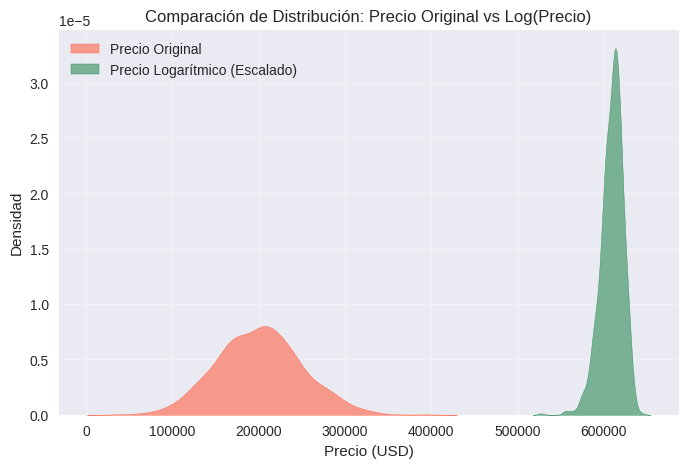

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['price'], shade=True, color="tomato", alpha=0.6, label="Precio Original")
sns.kdeplot(df_enhanced['log_price']*50000, shade=True, color="seagreen", alpha=0.6, label="Precio Logarítmico (Escalado)")
plt.legend()
plt.title("Comparación de Distribución: Precio Original vs Log(Precio)", fontsize=12)
plt.xlabel("Precio (USD)")
plt.ylabel("Densidad")
plt.grid(alpha=0.3)
plt.show()

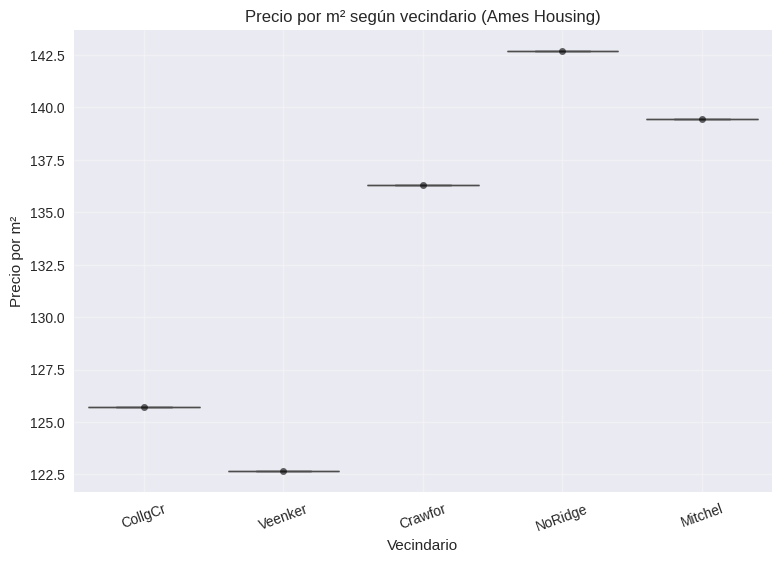

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(x='Neighborhood', y='price_per_sqft', data=ames_df, palette="Spectral", fliersize=0)
sns.stripplot(x='Neighborhood', y='price_per_sqft', data=ames_df, color='black', alpha=0.6, jitter=0.2)
plt.title("Precio por m² según vecindario (Ames Housing)", fontsize=12)
plt.xlabel("Vecindario")
plt.ylabel("Precio por m²")
plt.xticks(rotation=20)
plt.grid(alpha=0.3)
plt.show()

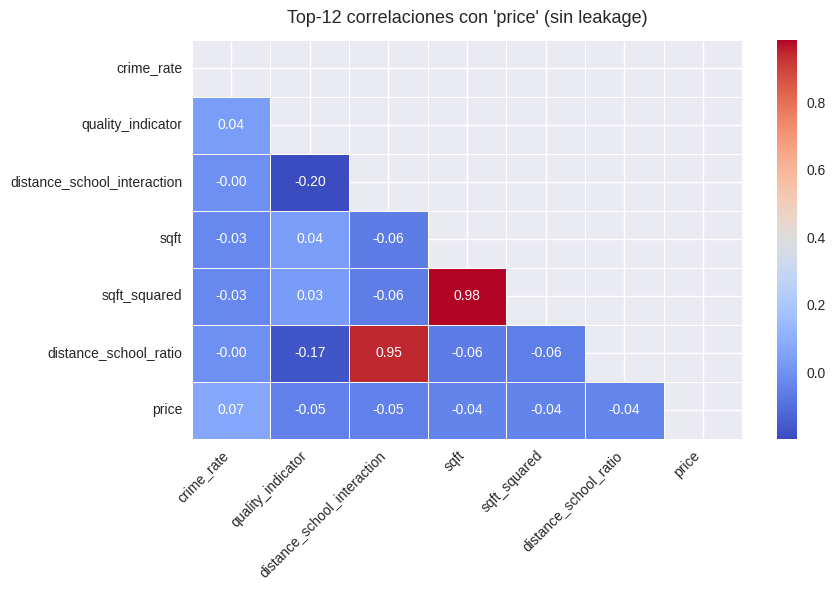

In [ ]:
drop_leak = {
    'price','log_price','price_per_sqft','price_per_bedroom',
    'efficiency_score','luxury_score','price_age_interaction'
}

df_numeric = df_enhanced.select_dtypes('number')
corr_price = df_numeric.corr()['price'].abs().sort_values(ascending=False)
top_features = corr_price.drop('price', errors='ignore').head(12).index.tolist()

num_clean = df_enhanced[top_features + ['price']].drop(
    columns=list(drop_leak & set(top_features)), errors='ignore'
).select_dtypes('number')

corr_matrix = num_clean.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(9,6))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title("Top-12 correlaciones con 'price' (sin leakage)", fontsize=13, pad=12)
plt.xticks(rotation=45, ha='right'); plt.yticks(rotation=0)
plt.tight_layout(); plt.show()

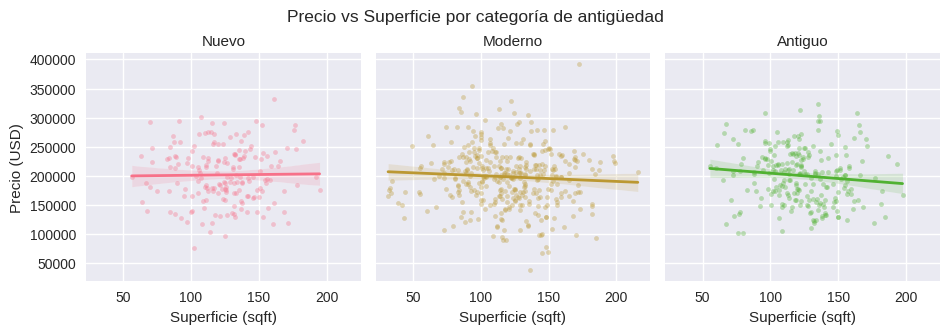

In [ ]:
g = sns.lmplot(
    data=df_enhanced.sample(min(800, len(df_enhanced)), random_state=42),
    x='sqft', y='price', col='age_category', hue='age_category',
    col_wrap=3, height=3.2, scatter_kws={'s':12, 'alpha':0.35}, line_kws={'lw':2}
)
g.set_axis_labels('Superficie (sqft)', 'Precio (USD)')
g.set_titles('{col_name}')
plt.suptitle('Precio vs Superficie por categoría de antigüedad', y=1.03, fontsize=12.5)
plt.show()

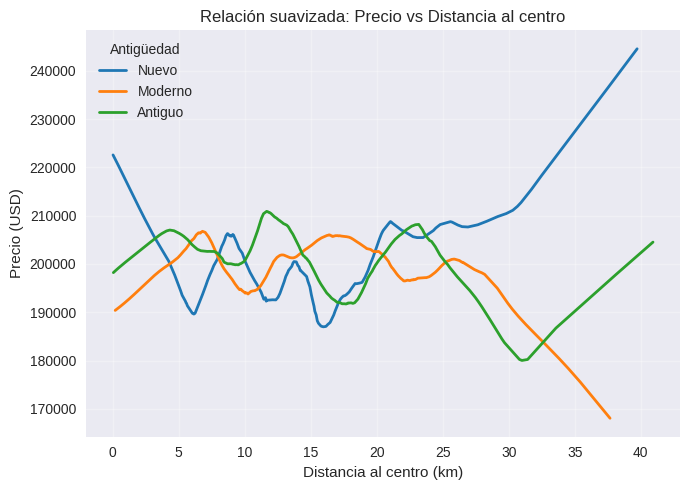

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess

plt.figure(figsize=(7,5))
colors = {'Nuevo':'tab:blue', 'Moderno':'tab:orange', 'Antiguo':'tab:green'}

for cat, color in colors.items():
    sub = df_enhanced[df_enhanced['age_category']==cat][['distance_to_city','price']].dropna().sort_values('distance_to_city')
    sm = lowess(sub['price'], sub['distance_to_city'], frac=0.25, return_sorted=True)
    plt.plot(sm[:,0], sm[:,1], lw=2, label=cat, color=color)

plt.xlabel('Distancia al centro (km)')
plt.ylabel('Precio (USD)')
plt.title('Relación suavizada: Precio vs Distancia al centro')
plt.legend(title='Antigüedad')
plt.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()

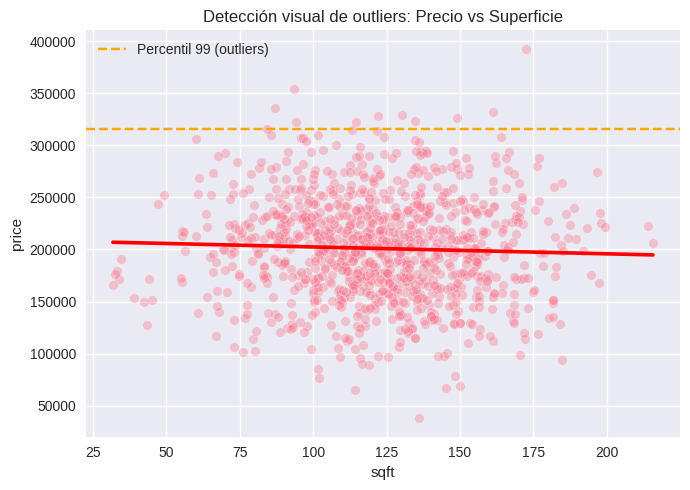

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_enhanced, x='sqft', y='price', alpha=0.35)
plt.xlabel('Superficie (sqft)')
plt.ylabel('Precio (USD)')
plt.title('Detección visual de outliers: Precio vs Superficie')

# Línea de tendencia
sns.regplot(data=df_enhanced, x='sqft', y='price', scatter=False, color='red', ci=None)

# Umbral superior (p.ej. percentil 99)
p99 = df_enhanced['price'].quantile(0.99)
plt.axhline(p99, color='orange', linestyle='--', label='Percentil 99 (outliers)')
plt.legend(); plt.tight_layout(); plt.show()

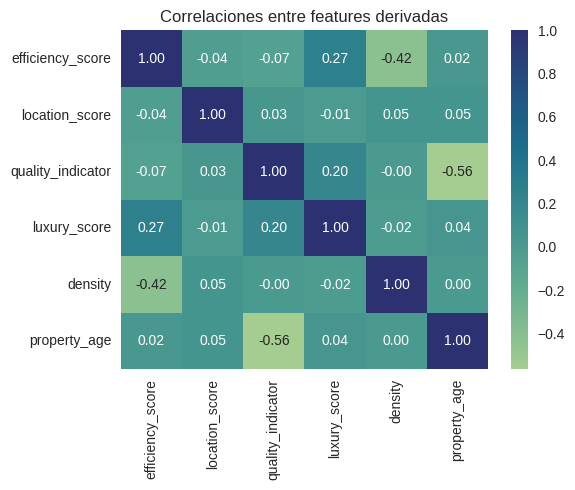

In [ ]:
features_custom = [
    'efficiency_score','location_score','quality_indicator',
    'luxury_score','density','property_age'
]
corr_custom = df_enhanced[features_custom].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_custom, annot=True, cmap='crest', fmt='.2f')
plt.title('Correlaciones entre features derivadas')
plt.tight_layout(); plt.show()

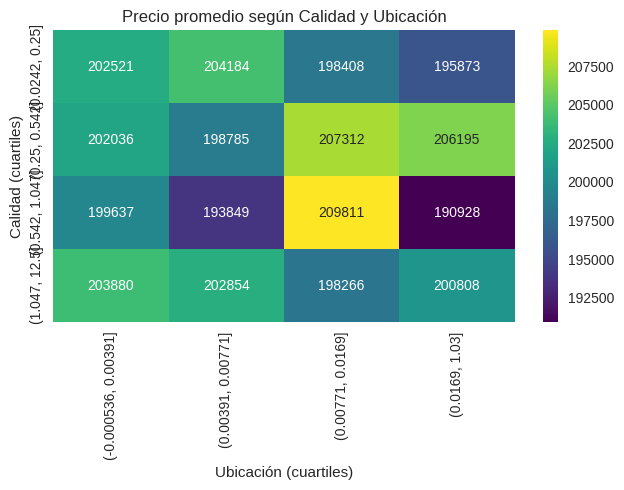

In [ ]:
pivot = df_enhanced.pivot_table(
    values='price', index=pd.qcut(df_enhanced['quality_indicator'], 4),
    columns=pd.qcut(df_enhanced['location_score'], 4),
    aggfunc='mean'
)
plt.figure(figsize=(6.5,5))
sns.heatmap(pivot, cmap='viridis', annot=True, fmt='.0f')
plt.title('Precio promedio según Calidad y Ubicación')
plt.xlabel('Ubicación (cuartiles)')
plt.ylabel('Calidad (cuartiles)')
plt.tight_layout(); plt.show()